In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

In [2]:
df = pd.read_csv('resources/tmdb-movies.csv')

### Investigation:

<hr>

How has popularity changed over time?

**Steps**: Isolate popularity and investigate how it's impacted by other factors.

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### What variables have the most effect on revenue

<hr>

Steps:

* Sort revenue to see if anything stands out
* Calculate correlation between variables to determine (based on our data) which variables are positively and negatively impacting revenue.


Cleanup:

* Drop ID as not related to data
* Drop revenue_adj and revenue as ~1:1 correlation known and not helpful for this analysis


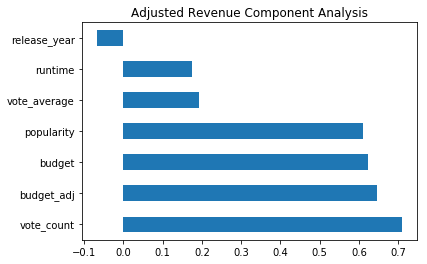

In [11]:
top_revenue = df.sort_values(by=['revenue_adj'],ascending=False)
revenue_corr = top_revenue.corr()['revenue_adj'].sort_values(ascending = False).\
    drop(['id','revenue_adj','revenue'])
revenue_corr.plot.barh(title = 'Adjusted Revenue Component Analysis',)

### Analysis

<hr>

Some notes about insight:

* While this effectively shows the relationship between variables, causality is not shown.  i.e. budget and popularity may impact revenue, but it could also be true that an increased budget may increase popularity independant of revenue.

### Group total popularity by year
<hr>
While vote count and budget have higher correlations to revenue, it would be more impactful to see the trends related to popularity as it's not directly related to how much money was spent making the movie and both incorporates vote count and value in calculation as well as the silent viewership.

**Steps** :

* Sum popularity in a release year groupby object
* Get a count of movies released in each year
* Normalize the popularity for each year by how many movies were released in that year
* Plot for insight

In [59]:
year_pop = df.groupby(['release_year']).sum()['popularity'].rename('popularity')
year_count = df.groupby(['release_year']).count()['id']
norm_pop = (year_pop/year_count).rename('popularity').reset_index()
norm_pop.head().style.hide_index()

release_year,popularity
1960,0.458932
1961,0.422827
1962,0.454783
1963,0.502706
1964,0.412428


Text(0.5, 1.0, 'Average Popularity of Movies by Release Year')

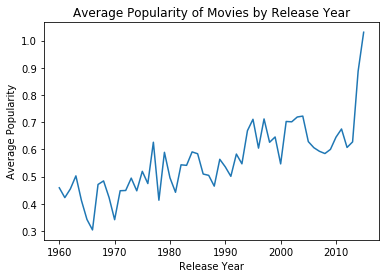

In [60]:
plt.plot(norm_pop.release_year,norm_pop.popularity)
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.title("Average Popularity of Movies by Release Year")

### Which Genres are most popular year to year?
It appears as though popularity has spiked significantly in the last 15 years of the dataset. A further investigation in trends is required to find out why.


<hr>

Steps:

* Break out individual genres from the multi-label grouping
* Label encode the genres uniformly for all years
* Plot

Cleanup:

* Split `genre` column values by `"|"` character
* One hot encode each genre, then merge those dataframes to layer multiple genres


In [61]:
# Split multi-label genres into columns
genre_split = df.genres.str.split('|', expand = True)
genre_split.describe()

,0,1,2,3,4
count,10843,8515,5079,1981,542
unique,20,20,20,20,19
top,Drama,Drama,Thriller,Thriller,Thriller
freq,2453,1619,886,450,120


In [62]:
# Loop through genre_split columns
merge_dict = {}
for i in range(0,4):
    merge_dict[i] = pd.get_dummies(genre_split[i])
# Merge together into a single dataframe with all labels for a given movie encoded
    if i > 0:
        merge_dict[0] = merge_dict[0] + merge_dict[i]
genre_col = merge_dict[0].columns.to_list()
# Rename for readability
genre_full = merge_dict[0]
genre_full.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<Figure size 432x288 with 0 Axes>

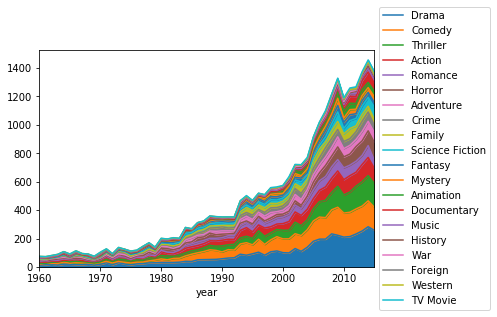

In [63]:
# Group by year and sum yearly genre totals
genre_full['year'] = df.release_year
genre_pop = genre_full.groupby('year').sum()
# Sort by genre sum total
genre_sum = genre_pop.sum().sort_values(ascending = False)
genre_pop = genre_pop[genre_sum.index]
# Plot
genre_plot = plt.figure()
genre_pop.plot(kind = 'area')
plt.legend(genre_sum.index,loc = 'center left', bbox_to_anchor = (1.0, 0.5))

### Rolling average of genre popularity over time

<hr>

<Figure size 432x288 with 0 Axes>

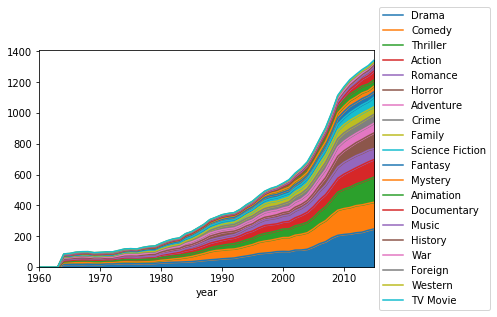

In [64]:
# 5 yr SMA applied to make shape clearer
genre_sma = genre_pop.rolling(5).mean()
sma_plot = plt.figure()
genre_sma.plot.area()
plt.legend(genre_sum.index,loc = 'center left', bbox_to_anchor = (1.0, 0.5))

## Multivariate subjective analysis
---
Investigate trends in seemingly related columns such as:

* Budget
* Revenue
* Popularity
* Vote Average

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A28DB86A0>,
      dtype=object)

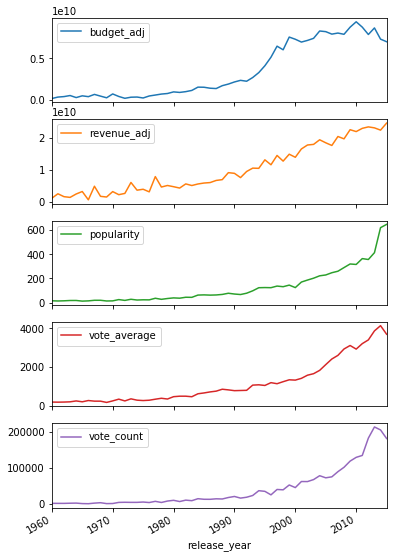

In [65]:
budget_pop = df.groupby('release_year')[['budget_adj','revenue_adj','popularity','vote_average','vote_count']].sum()
budget_pop.plot(subplots=True,figsize=(6,10),sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014A3022B550>,
      dtype=object)

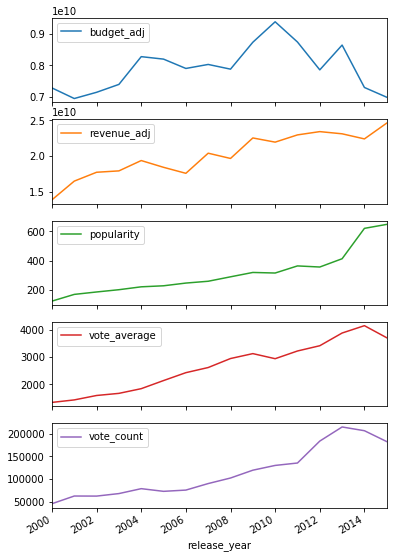

In [66]:
budget_pop = budget_pop.reset_index()
budget_pop.loc[budget_pop['release_year'] >=2000].set_index('release_year').plot(subplots=True,figsize=(6,10),sharex=True)

### Analysis
---
While it appears Average Vote values and popularity follow a similar trajectory, popularity (unclear what the basis for this metric is) seems to continue the trend while average vote value begins to diverge in recent years. This indicates a marked increase in critical review of films in the last year of the data set.  Interestingly, revenue appears to have had the opposite result, seeing a marked increase over 2014. In the same time span, budget has seen a decrease to the lowest value since 2001. More data is required to definitively determine the cause of this relationship.


# Conclusions:

<hr>

Based on the data, I can deduce Popularity sustained a steady increase over time with a rapid increase over the last ~5 years. I noted an increase of the Documentary and Horror genres over the last ~5 years. These are expanding markets and should be monitored in the future to determine long term trends toward the popularity of these genres.  While we can see an increased number of votes correlating to a higher revenue, from the longitudinal analysis of related variables above, we can see that popularity appears to be a more effective metric with which to begin to predict future trends. I would advise movie producers to fund movies in these genres in the near future to reap the benefits of this trend.